# Initial Setup (YOLOv11)

In [ ]:
# Check for NVIDIA CUDA GPU
!nvidia-smi

# Set {HOME}
import os
HOME = os.getcwd()
print(HOME)

Mon May 12 00:22:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   39C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Check for GPU availability
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Install latest stable version of PyTorch with CUDA or CPU-only
!pip install --quiet torch torchvision torchaudio

# Test import
import torchvision
from torchvision import datasets, models, transforms

Using device: cuda
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.7 MB/s eta 0:00:00


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 41.6/235.7 GB disk)


# YOLO Sample Image

In [ ]:
!mkdir {HOME}/yolo_test
%cd {HOME}/yolo_test

!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

mkdir: cannot create directory ‘/content/yolo_test’: File exists
/content/yolo_test
100% 5.35M/5.35M [00:00<00:00, 123MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 108MB/s]
image 1/1 /content/yolo_test/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 47.0ms
Speed: 2.6ms preprocess, 47.0ms inference, 182.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


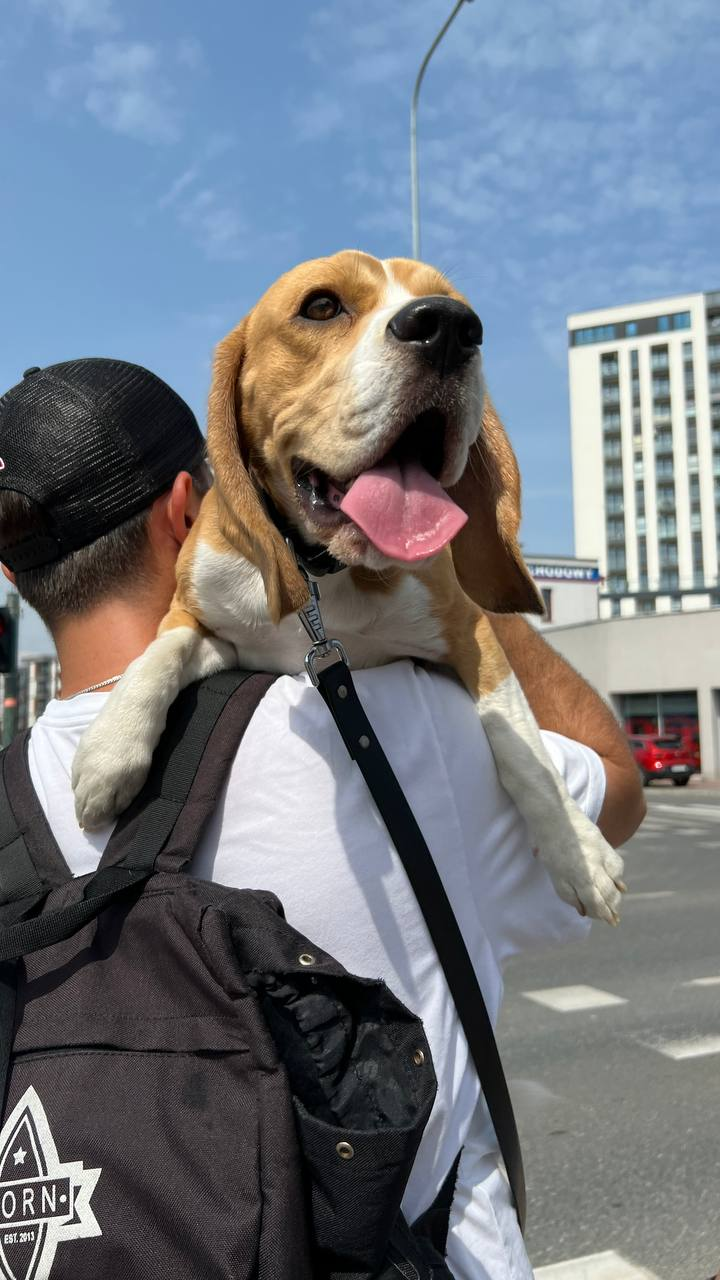

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/yolo_test/dog.jpeg', width=600)

In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 57.4ms
Speed: 3.9ms preprocess, 57.4ms inference, 147.2ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
result.boxes.xyxy

tensor([[3.0705e+02, 6.4341e+02, 5.2919e+02, 1.2558e+03],
        [6.1400e+01, 2.4994e+02, 6.5165e+02, 9.7412e+02],
        [1.7803e+00, 3.5551e+02, 6.3404e+02, 1.2788e+03],
        [1.1933e+00, 3.5620e+02, 3.8455e+02, 1.2776e+03],
        [6.2615e+02, 7.1818e+02, 6.9975e+02, 7.8754e+02]], device='cuda:0')

In [ ]:
result.boxes.conf

tensor([0.6832, 0.6284, 0.5941, 0.3923, 0.3875], device='cuda:0')

In [ ]:
result.boxes.cls

tensor([26., 16.,  0.,  0.,  2.], device='cuda:0')

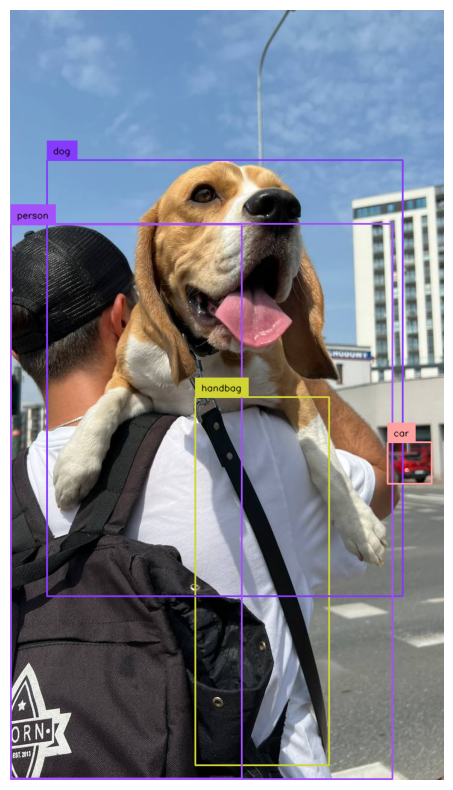

In [ ]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

# smdcomponents

In [ ]:
# Set 'dataset' Directory
!mkdir {HOME}/datasets
%cd {HOME}/datasets/

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vd6IwKW3GVZBtvpNvbj7")
project = rf.workspace("ece4490").project("smdcomponents-xlsmf")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to smdComponents-3 in yolov11:: 100%|██████████| 10800/10800 [00:01<00:00, 9699.05it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml
epochs=50 imgsz=640 lr0=0.001 lrf=0.01 weight_decay=0.0001 warmup_epochs=3.0 warmup_bias_lr=0.1 cls=0.6 box=0.05 iou=0.3 mosaic=0.3 mixup=0.0 hsv_h=0.015 hsv_s=0.5 hsv_v=0.4 translate=0.05 scale=0.3 fliplr=0.3 plots=True

In [ ]:
# Save a checkpoint BEFORE downloading all data
from google.colab import drive
drive.mount('/content/gdrive')

import torch
model_save_name = 'smd-components.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
torch.save(model.state_dict(), path)

In [ ]:
# Mount Google Drive and Download all data
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree(
    '/content/runs/detect/train',
    '/content/drive/MyDrive/yolo_train_artifacts/yolov11_smd-components'
)

# Note that you will need to get a Google Sharable Link to the model to redownload it.

# printed-circuit-board-fip9y

In [ ]:
# Set 'dataset' Directory
!mkdir {HOME}/datasets
%cd {HOME}/datasets/

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vd6IwKW3GVZBtvpNvbj7")
project = rf.workspace("ece4490").project("printed-circuit-board-fip9y")
version = project.version(2)
dataset = version.download("yolov11")

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml
epochs=20 imgsz=640 lr0=0.001 lrf=0.01 weight_decay=0.0001 warmup_epochs=3.0 warmup_bias_lr=0.1 cls=0.6 box=0.05 iou=0.3 mosaic=0.3 mixup=0.0 hsv_h=0.015 hsv_s=0.5 hsv_v=0.4 translate=0.05 scale=0.3 fliplr=0.3 plots=True

In [ ]:
# Save a checkpoint BEFORE downloading all data
from google.colab import drive
drive.mount('/content/gdrive')

import torch
model_save_name = 'printed-circuit-board.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
torch.save(model.state_dict(), path)

In [ ]:
# Mount Google Drive and Download all data
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree(
    '/content/runs/detect/train',
    '/content/drive/MyDrive/yolo_train_artifacts/yolov11_printed-circuit-board'
)

# Note that you will need to get a Google Sharable Link to the model to redownload it.

# pcb-electronic-components-yalh6

In [ ]:
# Set 'dataset' Directory
!mkdir {HOME}/datasets
%cd {HOME}/datasets/

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vd6IwKW3GVZBtvpNvbj7")
project = rf.workspace("ece4490").project("pcb-electronic-components-yalh6")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to PCB-Electronic-components-1 in yolov11:: 100%|██████████| 7328/7328 [00:01<00:00, 4481.23it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 lr0=0.001 lrf=0.01 weight_decay=0.0001 warmup_epochs=3.0 warmup_bias_lr=0.1 cls=0.6 box=0.05 iou=0.3 mosaic=0.3 mixup=0.0 hsv_h=0.015 hsv_s=0.5 hsv_v=0.4 translate=0.05 scale=0.3 fliplr=0.3 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 191MB/s]
New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/PCB-Electronic-components-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.3, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_n

In [ ]:
# Save a checkpoint BEFORE downloading all data
from google.colab import drive
drive.mount('/content/gdrive')

import torch
model_save_name = 'pcb-electronic-components.pt'
path = F"/content/gdrive/My Drive/{model_save_name}"
torch.save(model.state_dict(), path)

In [ ]:
# Mount Google Drive and Download all data
from google.colab import drive
import shutil

drive.mount('/content/drive')
shutil.copytree(
    '/content/runs/detect/train',
    '/content/drive/MyDrive/yolo_train_artifacts/yolov11_pcb-electronic-components'
)

# Note that you will need to get a Google Sharable Link to the model to redownload it.

# Reimport Model Checkpoint (If Needed)

In [ ]:
# Installation
!pip install gdown==3.6.0

In [ ]:
# Use Google Sharable Link ID here:
my_file_id = "10Tk0ZF_6-EhayyoF80OClqFCF0b-HPGS"

# Download via Google Sharable Link with ID:
!gdown https://drive.google.com/uc?id={my_file_id}

# Display Data from Dataset

In [ ]:
# Install dependencies
!pip install pandas

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1745451214.2b7b398696cc.4993.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


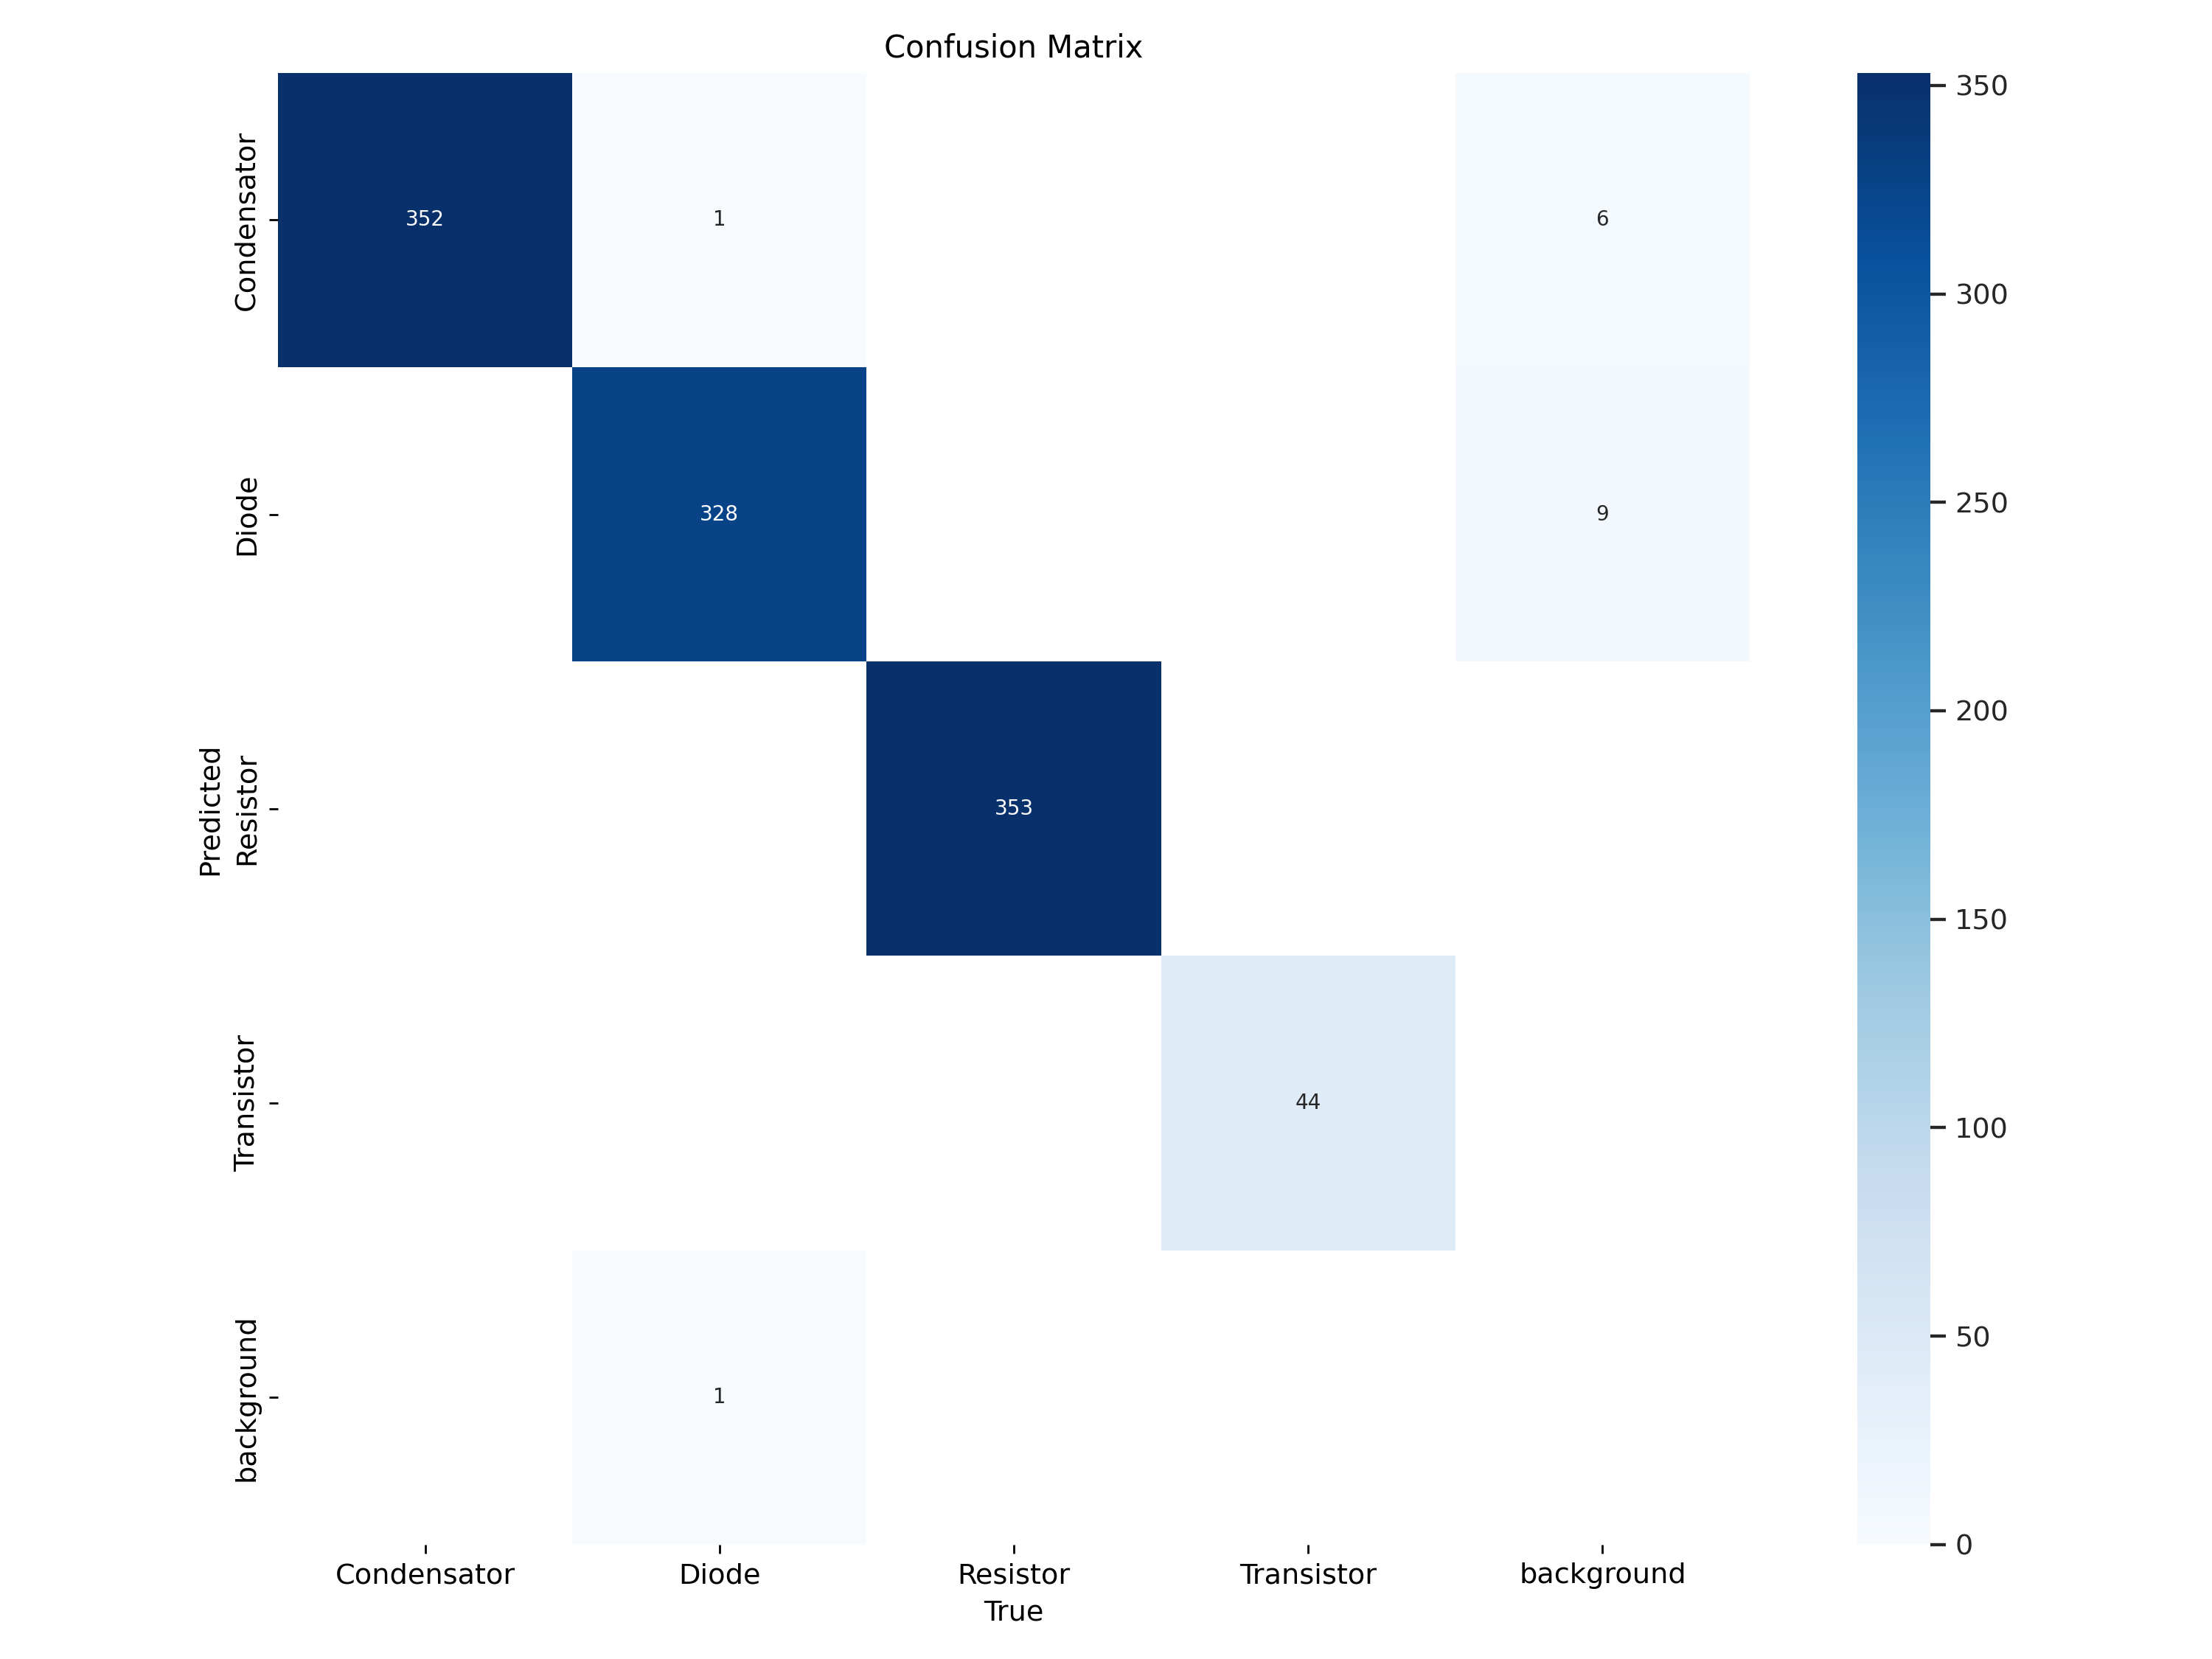

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

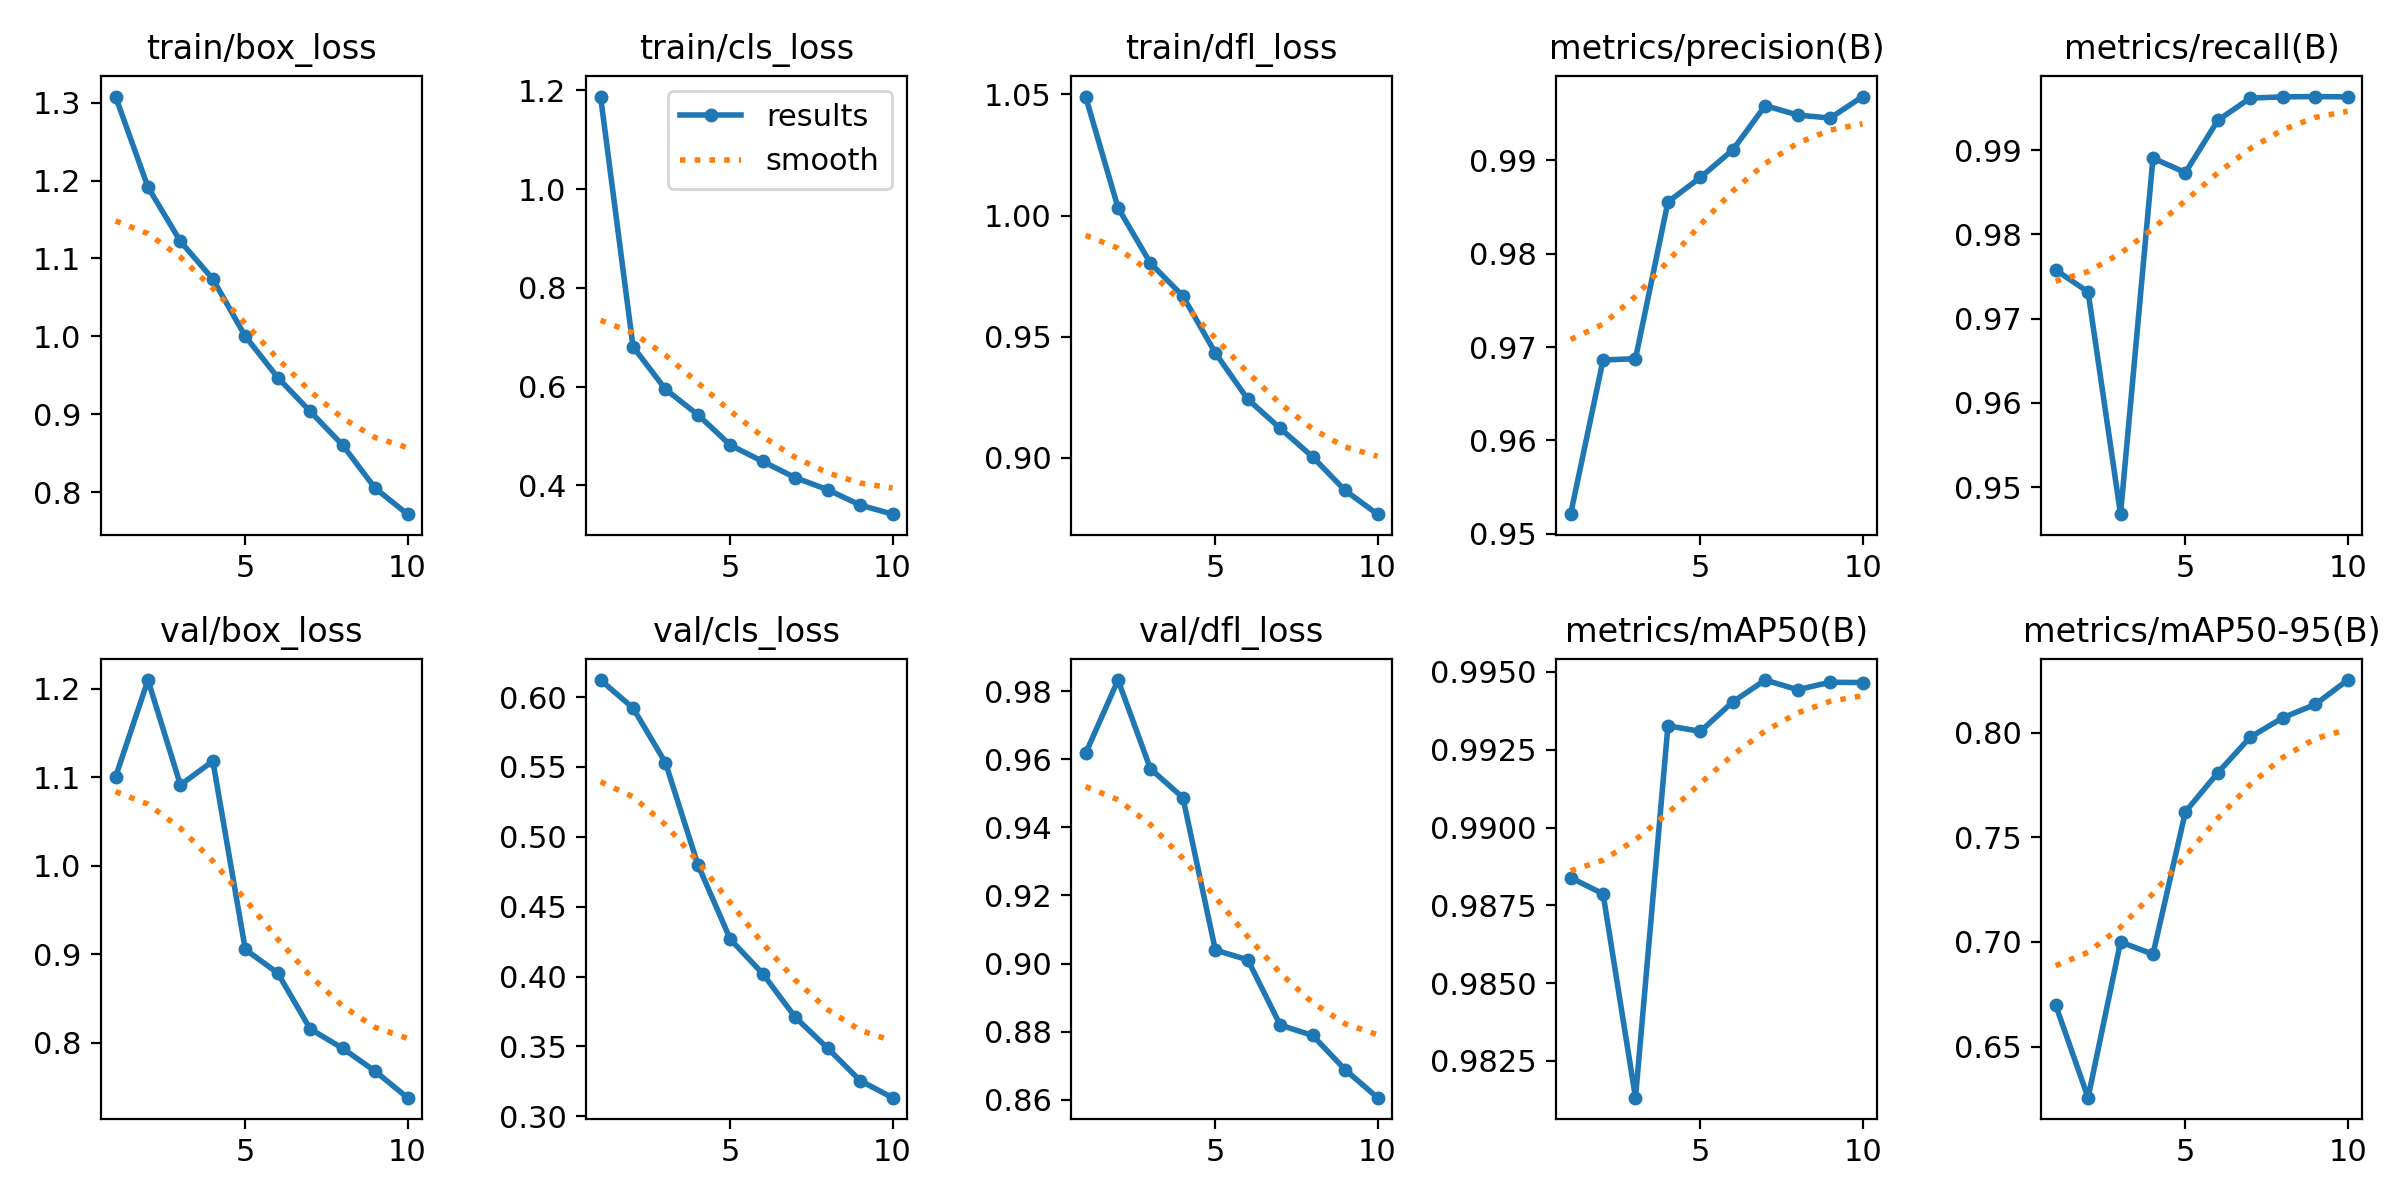

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

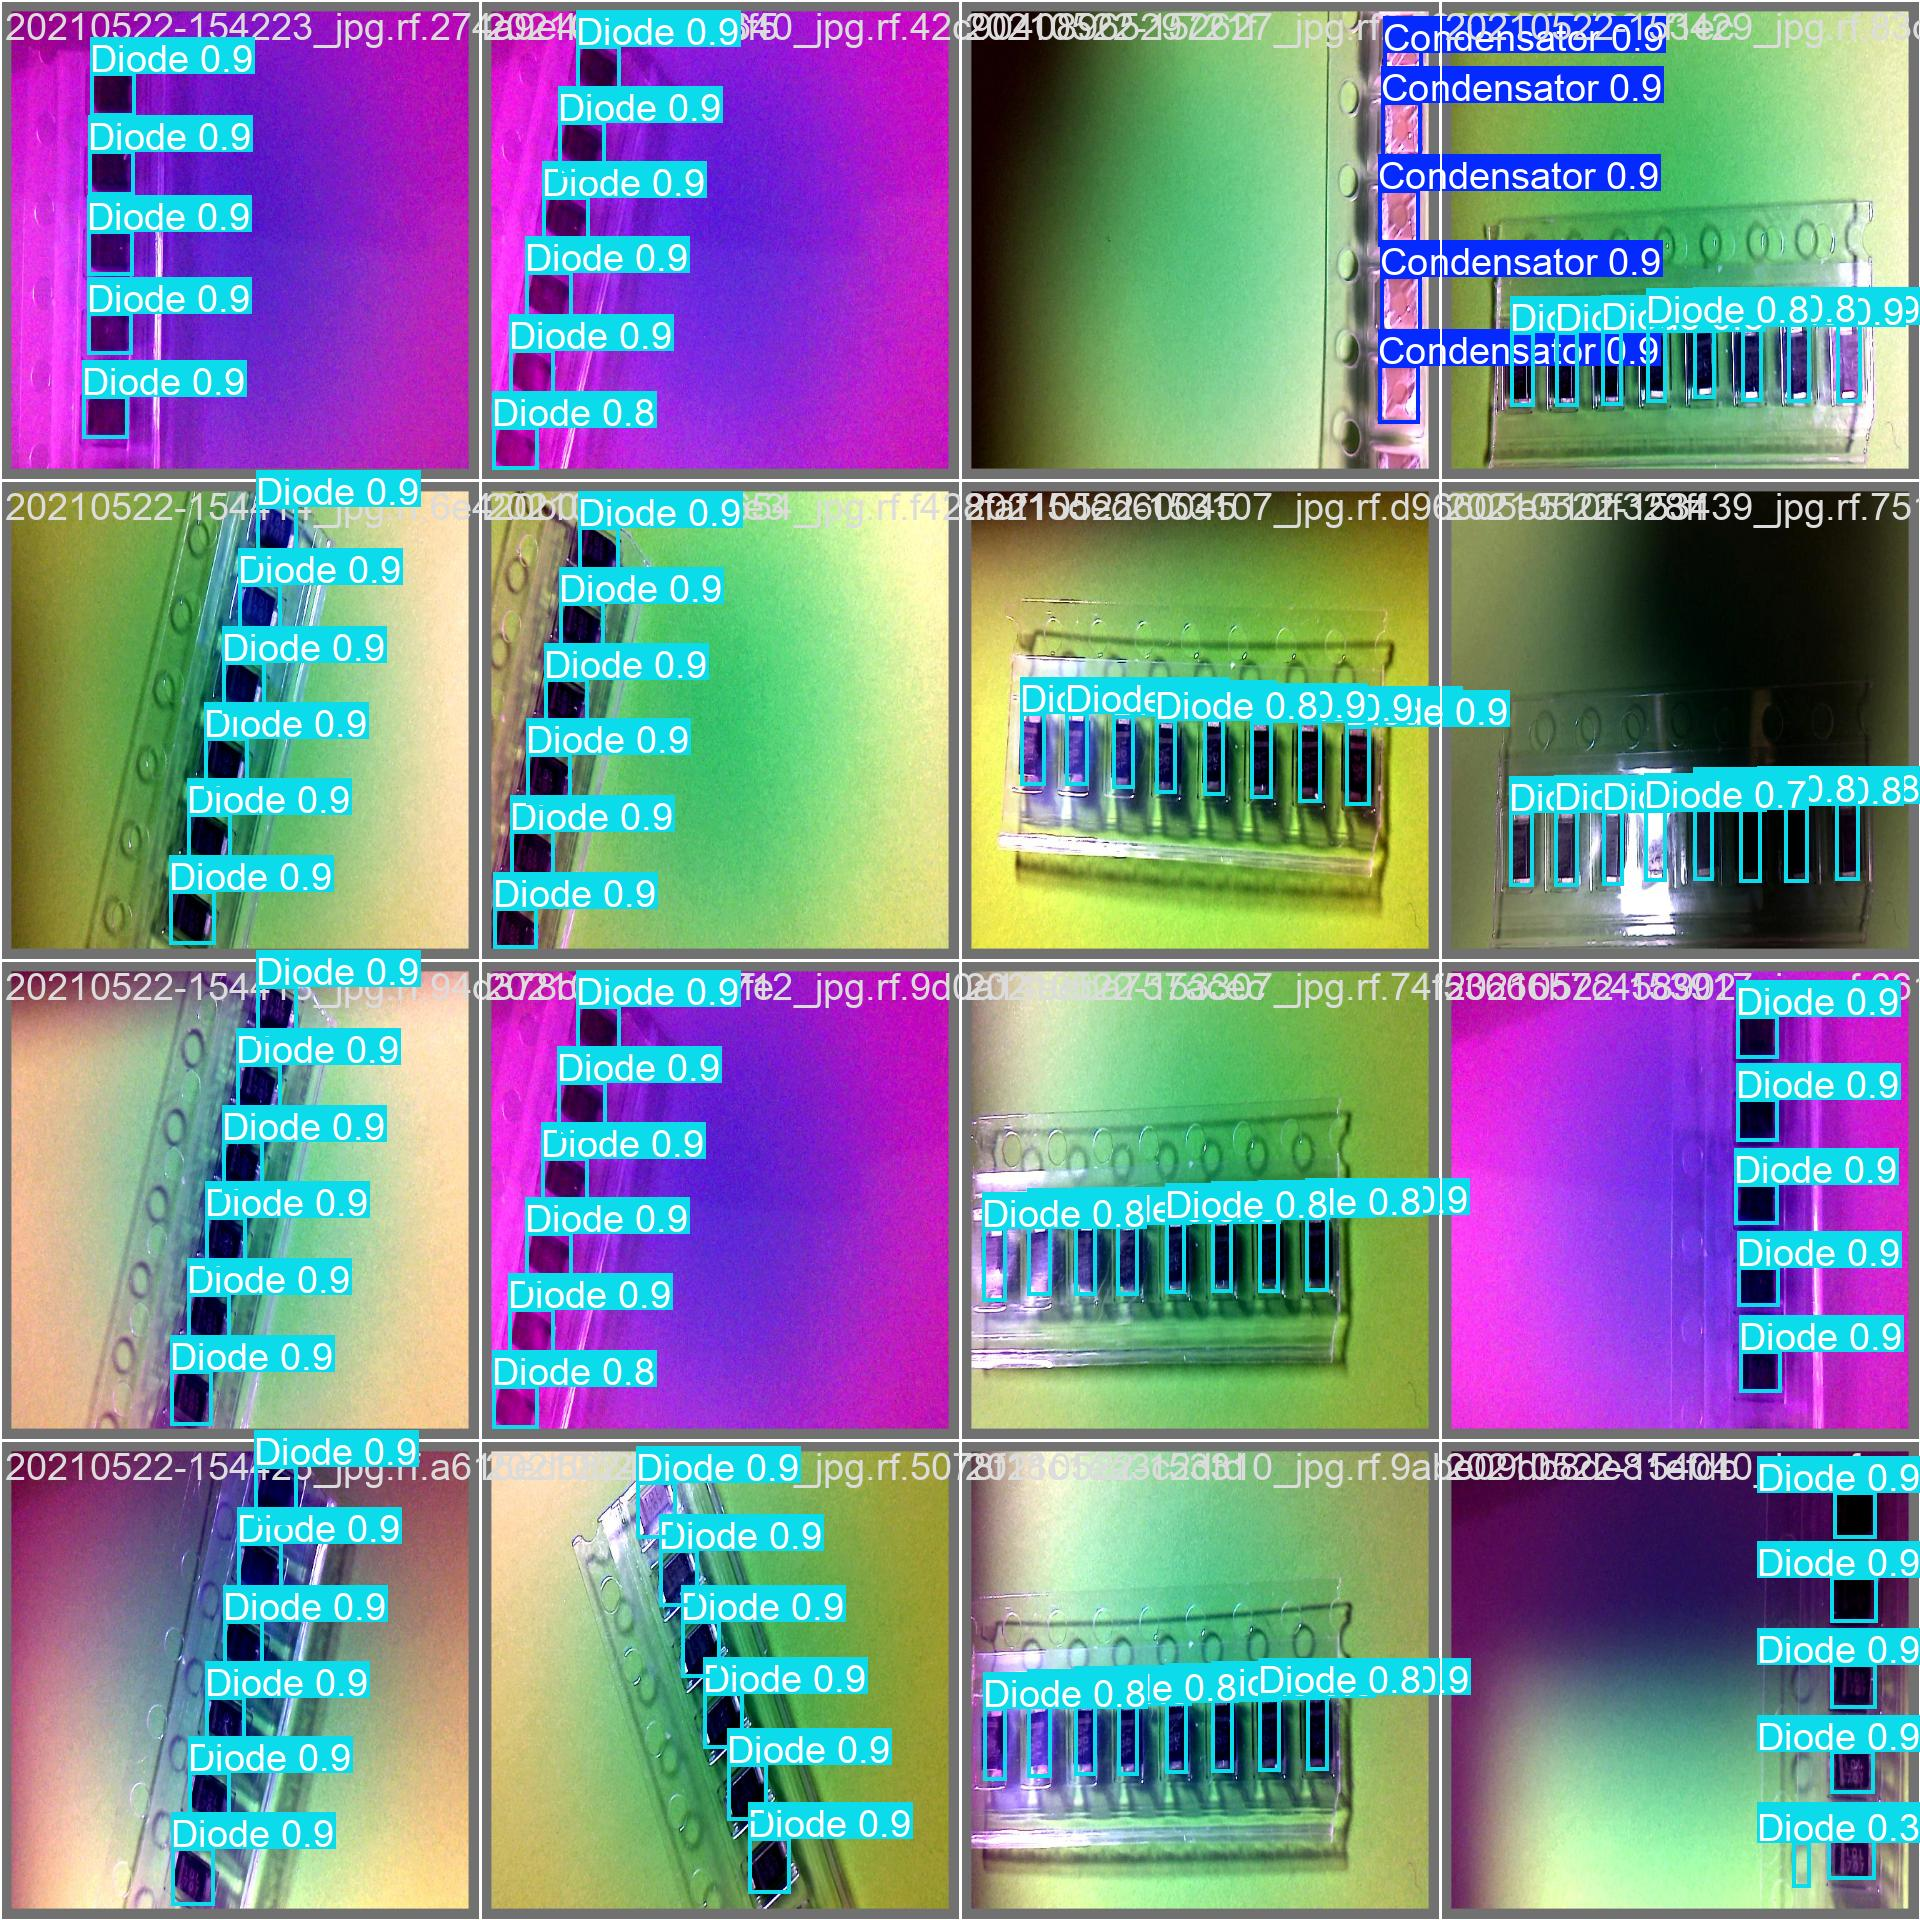

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/smdComponents-2/valid/labels.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:05<00:00,  3.42it/s]
                   all        300       1079      0.997      0.996      0.995      0.827
           Condensator        145        352      0.993      0.994      0.994      0.823
                 Diode        137        330      0.997      0.991      0.995      0.825
              Resistor        123        353          1          1      0.995      0.842
            Transistor          3         44      0.998          1      0.995       0.82
Speed: 1.3ms preprocess, 9.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn mo

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/300 /content/datasets/smdComponents-2/test/images/20210517-082637_jpg.rf.0fe8b351cfad8e2f949e06e4cc93c789.jpg: 640x640 1 Condensator, 15.5ms
image 2/300 /content/datasets/smdComponents-2/test/images/20210517-091436_jpg.rf.1475bd569c164f6e2d3a662d46eaa0ea.jpg: 640x640 1 Condensator, 15.5ms
image 3/300 /content/datasets/smdComponents-2/test/images/20210517-093508_jpg.rf.f8457bc51c7206873ca85ec736bb1aae.jpg: 640x640 1 Condensator, 15.2ms
image 4/300 /content/datasets/smdComponents-2/test/images/20210517-124606_jpg.rf.70e0b5e7e235bab173d97cb01e73c256.jpg: 640x640 1 Condensator, 1 Diode, 1 Resistor, 15.3ms
image 5/300 /content/datasets/smdComponents-2/test/images/20210517-130525_jpg.rf.ec8d3316cdb805b8557cef524e99424c.jpg: 640x640 1 Condensator, 1 Diode, 1 Resistor, 15.3ms
image 6/300 /content/datasets/smdComponents-2/

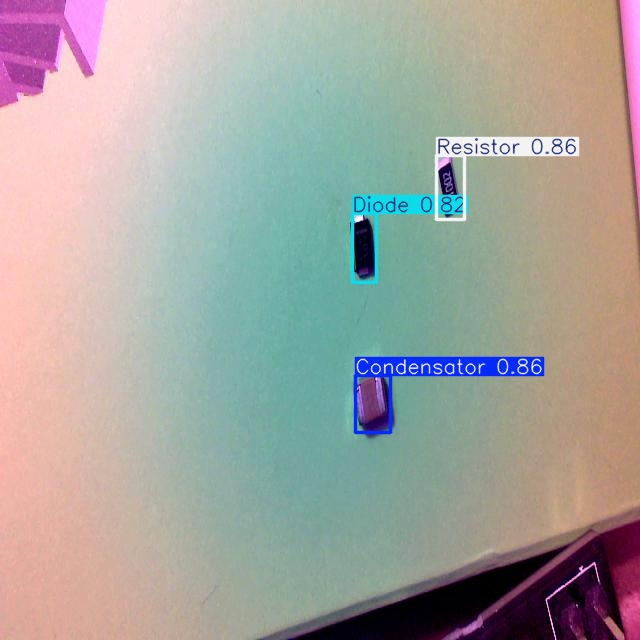

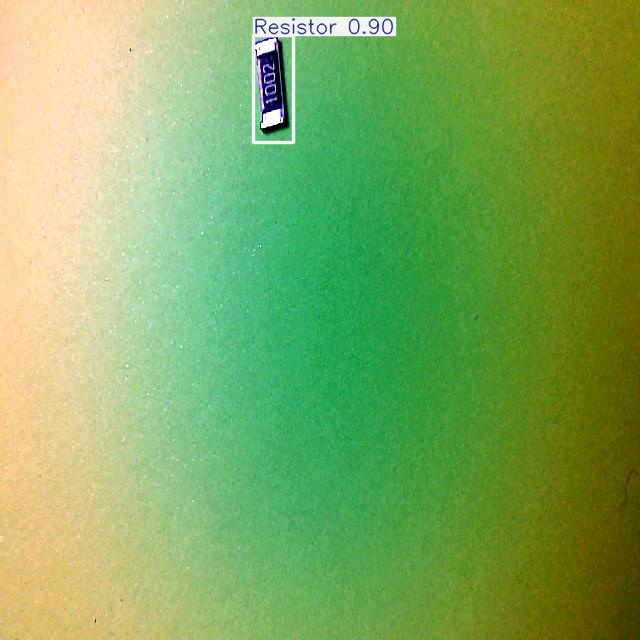

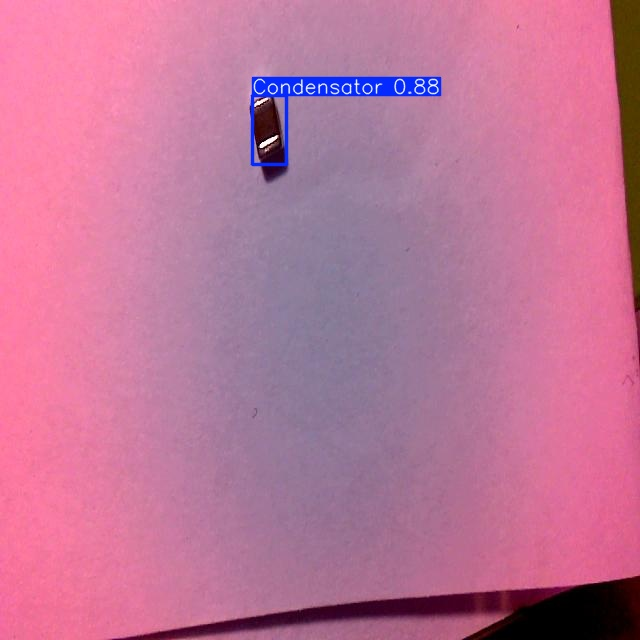

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  events.out.tfevents.1745453105.2b7b398696cc.13084.0	weights


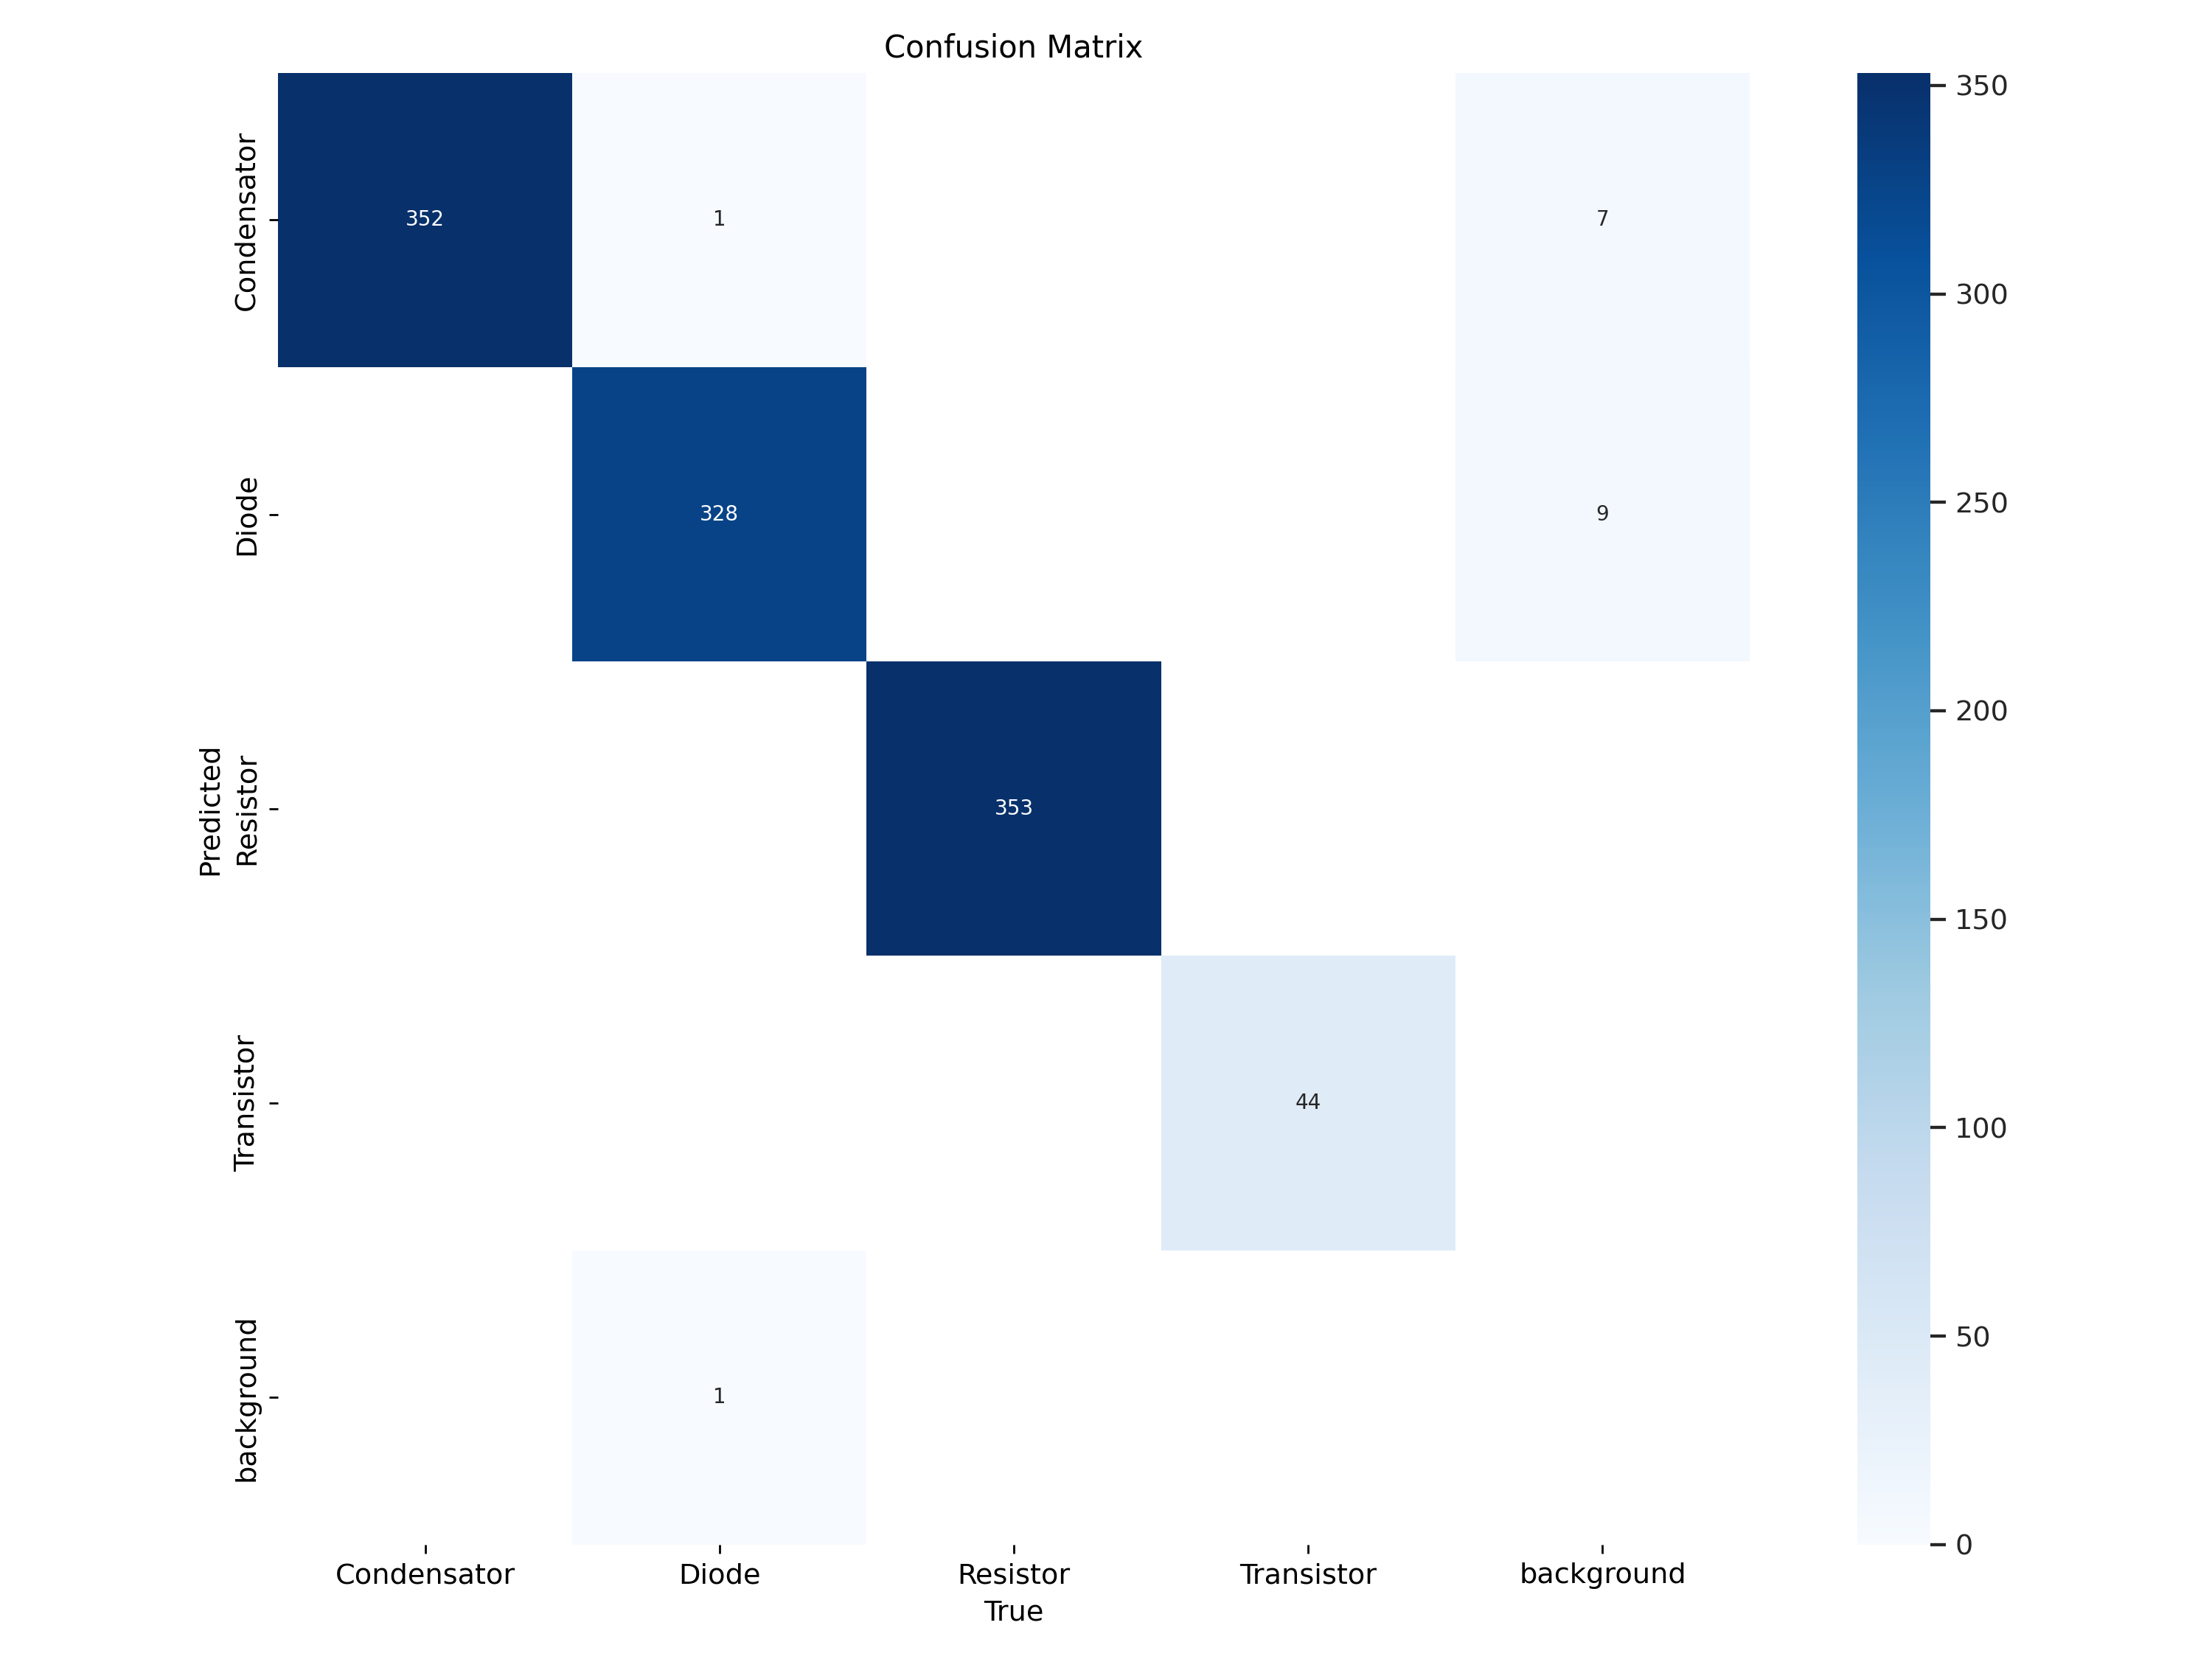

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)